В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [42]:
car_df = pd.read_csv('cars.csv')
car_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [43]:
pd.DataFrame.info(car_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [44]:
nunique_cat = car_df.select_dtypes(include='object').nunique()
nunique_cat

Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

In [45]:
for category in nunique_cat.index:
    print(category, car_df[category].unique(), '\n')

Brand ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes'] 

Model ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport'] 

Fuel_Type ['Petrol' 'Diesel'] 

Transmission ['Manual' 'Automatic'] 

Owner_Type ['First' 'Second' 'Third'] 



**В наборі даних 7 числових (не враховуючи Car_ID) і 5 категоріальних колонок з них:**
- 2 бінарні (мають лише 2 значення, колонки `Fuel_Type` та `Transmission`) 
- 2 мультикатегоріальних зі значеннями, для яких немає відношення порядку (колонки `Brand` та `Model`)
- 1 колонка, в якій можна встановити відношення порядку (а саме First < Second < Third для `Owner_Type`)

Щодо колонки Car_ID - це унікальний ідентифікатор, який не повинен використовуватись як ознака в моделі.

In [46]:
car_df.columns = car_df.columns.str.lower()

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [47]:
inputs = car_df.drop(columns=['price', 'car_id'])
targets = car_df['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

In [49]:
# зберігаємо для подальших розрахунків
columns_without_codes = X_train.select_dtypes(include='number').columns.to_list()

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

1. Кодуємо колонки `fuel_type` і `transmission`

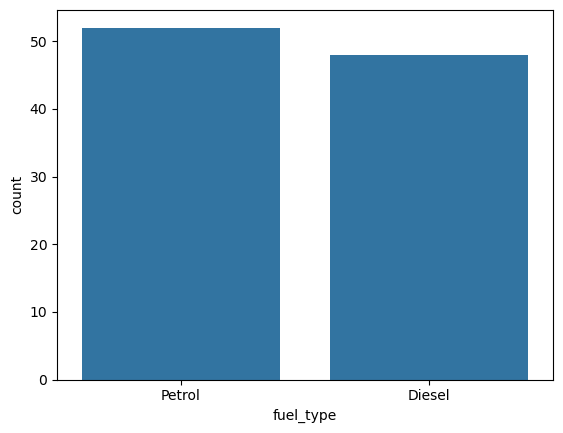

In [50]:
sns.countplot(data=car_df, x='fuel_type');

In [51]:
fuel_type_codes = {'Petrol': 1, 'Diesel': 0}
X_train['is_petrol'] = X_train.fuel_type.map(fuel_type_codes)
X_test['is_petrol'] = X_test.fuel_type.map(fuel_type_codes)

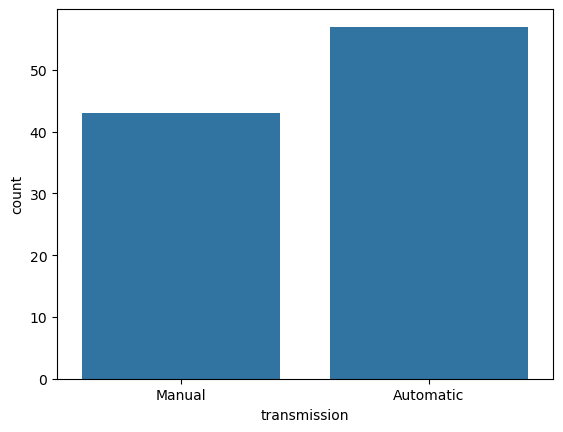

In [52]:
sns.countplot(data=car_df, x='transmission');

In [53]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['is_automatic'] = X_train.transmission.map(transmission_codes)
X_test['is_automatic'] = X_test.transmission.map(transmission_codes)

2. Кодуємо колонку `Brand`

In [54]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[['brand']])

brand_train_ohe = enc.transform(X_train[['brand']]).toarray()
brand_test_ohe  = enc.transform(X_test[['brand']]).toarray()

brand_cols = [f'brand_{col.lower()}' for col in enc.categories_[0]]

X_train[brand_cols] = brand_train_ohe
X_test[brand_cols] = brand_test_ohe

X_train.head()

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_automatic,brand_audi,brand_bmw,brand_ford,brand_honda,brand_hyundai,brand_mahindra,brand_maruti,brand_mercedes,brand_tata,brand_toyota,brand_volkswagen
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


3. Кодування колонки `Owner_Type`

In [55]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['owner_type']])

X_train['owner_type_code'] = ordenc.transform(X_train[['owner_type']])
X_test['owner_type_code'] = ordenc.transform(X_test[['owner_type']])

4. Кодування колонки `Model`

In [56]:
# шукаємо медіанну ціну для кожної моделі
car_model_median = pd.concat([X_train['model'], y_train], axis=1).groupby('model')['price'].median()
car_model_median.head()

model
3 Series    2800000.0
5 Series    3000000.0
7 Series    3500000.0
A3          2000000.0
A5          2600000.0
Name: price, dtype: float64

In [57]:
# розділяємо ціни по впорядкованим категоріям
n_groups = 3 # порівнюючи співвідношення rmse для train та test вибірки - ця к-сть є найоптимальнішою
labels = [f'price_{i}' for i in range(1, n_groups + 1)]
model_category = pd.qcut(car_model_median, q=n_groups, labels=labels)
model_category.head()

model
3 Series    price_3
5 Series    price_3
7 Series    price_3
A3          price_3
A5          price_3
Name: price, dtype: category
Categories (3, object): ['price_1' < 'price_2' < 'price_3']

In [58]:
X_train['model_cat'] = X_train['model'].map(model_category)
X_test['model_cat'] = X_test['model'].map(model_category)

# якщо в test є модель, якої не було в train
X_test['model_cat'] = X_test['model_cat'].cat.add_categories(['unknown']).fillna('unknown')

In [59]:
# кодуємо наші цінові категорії за допомогою OneHotEncoder
ohe_model = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_model.fit(X_train[['model_cat']])

ohe_model_train = ohe_model.transform(X_train[['model_cat']])
ohe_model_test = ohe_model.transform(X_test[['model_cat']])
ohe_model_cols = ohe_model.get_feature_names_out(['model_cat'])

ohe_model_train_df = pd.DataFrame(ohe_model_train, columns=ohe_model_cols, index=X_train.index)
ohe_model_test_df = pd.DataFrame(ohe_model_test, columns=ohe_model_cols, index=X_test.index)

X_train = pd.concat([X_train, ohe_model_train_df], axis=1)
X_test = pd.concat([X_test, ohe_model_test_df], axis=1)
X_train = X_train.drop(columns=['model_cat'])
X_test  = X_test.drop(columns=['model_cat'])

X_train.head()

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_automatic,brand_audi,brand_bmw,brand_ford,brand_honda,brand_hyundai,brand_mahindra,brand_maruti,brand_mercedes,brand_tata,brand_toyota,brand_volkswagen,owner_type_code,model_cat_price_1,model_cat_price_2,model_cat_price_3
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Очікуваний результат після трансформацій:

In [60]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_automatic,brand_audi,brand_bmw,brand_ford,brand_honda,brand_hyundai,brand_mahindra,brand_maruti,brand_mercedes,brand_tata,brand_toyota,brand_volkswagen,owner_type_code,model_cat_price_1,model_cat_price_2,model_cat_price_3
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,is_petrol,is_automatic,brand_audi,brand_bmw,brand_ford,brand_honda,brand_hyundai,brand_mahindra,brand_maruti,brand_mercedes,brand_tata,brand_toyota,brand_volkswagen,owner_type_code,model_cat_price_1,model_cat_price_2,model_cat_price_3
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [61]:
X_train = X_train.select_dtypes(include='number')
df_corr = pd.concat([X_train, y_train], axis=1)

corr = df_corr.corr()
corr['price'].sort_values(ascending=False)

price                1.000000
model_cat_price_3    0.906718
power                0.849137
engine               0.710561
is_automatic         0.680731
brand_bmw            0.477522
brand_mercedes       0.431606
brand_audi           0.328858
seats                0.000979
brand_ford          -0.004592
brand_toyota        -0.023778
kilometers_driven   -0.083951
is_petrol           -0.110782
brand_volkswagen    -0.158742
brand_mahindra      -0.178627
brand_honda         -0.209779
year                -0.233769
brand_maruti        -0.249737
model_cat_price_2   -0.252089
brand_hyundai       -0.263022
owner_type_code     -0.265537
brand_tata          -0.341815
mileage             -0.638404
model_cat_price_1   -0.708062
Name: price, dtype: float64

***Колонки, які корелюють з цільовою змінною на більш ніж 0.5 (позитивна та негативна кореляція):***

In [62]:
corr_price = corr['price'].drop('price')
corr_price[corr_price.abs() > 0.5].sort_values(ascending=False)

model_cat_price_3    0.906718
power                0.849137
engine               0.710561
is_automatic         0.680731
mileage             -0.638404
model_cat_price_1   -0.708062
Name: price, dtype: float64

**Бачимо, що найбільшу кореляцію з цільовою змінною мають такі колонки, як:**  
- позитивна кореляція: `model_cat_price_3` (corr = 0.91), `power` (corr = 0.85), `engine` (corr = 0.71),`is_automatic` (corr = 0.68)
- негативна кореляція: `mileage` (corr = -0.64), `model_cat_price_1` (corr = -0.71)

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [63]:
X_test = X_test.select_dtypes(include='number')

In [64]:
model = LinearRegression().fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

loss_train = root_mean_squared_error(y_train, predictions_train)
loss_test = root_mean_squared_error(y_test, predictions_test)

print(f'Train Loss: {loss_train}\nTest Loss: {loss_test}')
np.std(y_train), np.std(y_test)

Train Loss: 199387.00079457674
Test Loss: 220336.6441803386


(1033882.2466799592, 672495.3531437968)

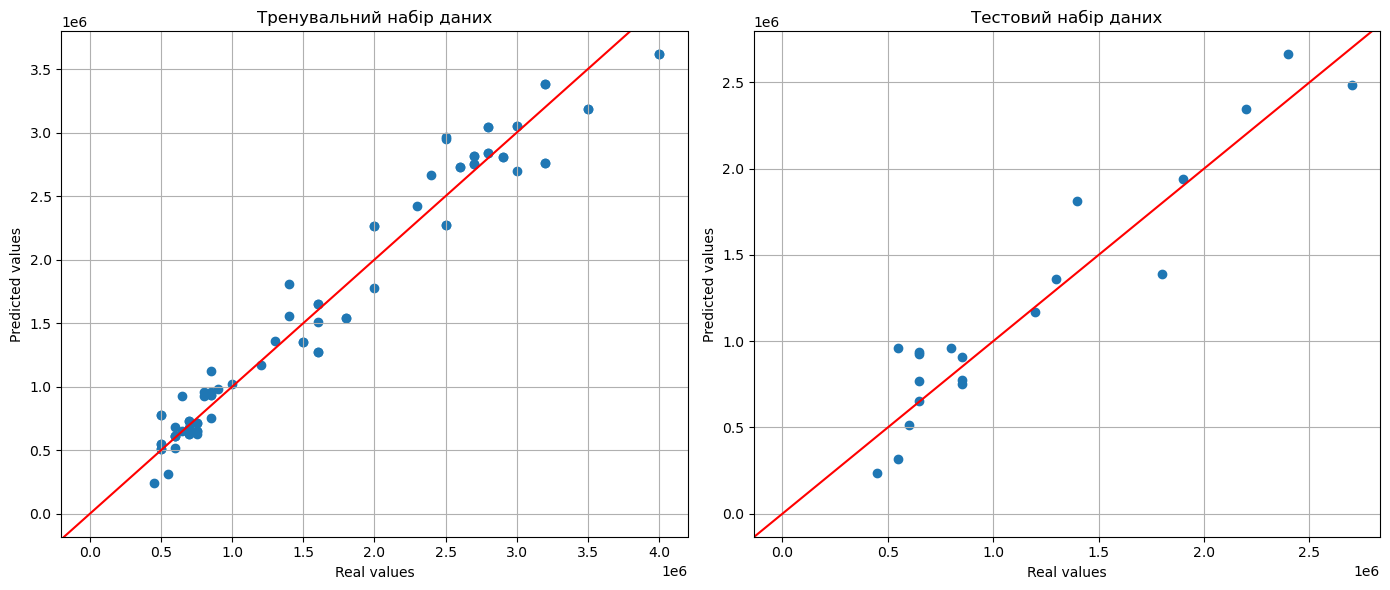

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# train
axes[0].scatter(y_train, predictions_train)
axes[0].set_title('Тренувальний набір даних')
axes[0].set_xlabel('Real values')
axes[0].set_ylabel('Predicted values')
axes[0].axline((0, 0), slope=1, color='red')
axes[0].grid(True)

# test
axes[1].scatter(y_test, predictions_test)
axes[1].set_title('Тестовий набір даних')
axes[1].set_xlabel('Real values')
axes[1].set_ylabel('Predicted values')
axes[1].axline((0, 0), slope=1, color='red')
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Дивлячись на графіки, можемо зробити наступні висновки:**
- що на train, так і на test точки розташовані вздовж діагоналі y = x з помірним розкидом (можливо для test трохи більший розкид, але це нормально), що говорить про те, що модель вивчила загальну залежність і відтворює її на нових даних
- при чому точки на train не «прилипають» до лінії ідеального прогнозу, а на test не розсипаються хаотично, що означає, що модель не перенавчена
- порівнюючи RMSE(train) = 199387 і RMSE(test) = 220337 - різниця не дуже критична, що теж свідчить про відсутність перенавчання

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [66]:
scaler = StandardScaler()
scaler.fit(X_train[columns_without_codes])

scaled_inputs_train = scaler.transform(X_train[columns_without_codes])
scaled_inputs_test = scaler.transform(X_test[columns_without_codes])

In [67]:
columns_with_codes = [col for col in X_train.columns if col not in columns_without_codes]
categorical_data_train = X_train[columns_with_codes].values
categorical_data_test = X_test[columns_with_codes].values

X_train_scaled = np.concatenate((scaled_inputs_train, categorical_data_train), axis=1)
X_test_scaled = np.concatenate((scaled_inputs_test, categorical_data_test), axis=1)

In [68]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression(fit_intercept=False).fit(sm.add_constant(inputs), targets)
  predictions = model.predict(sm.add_constant(inputs))
  loss = root_mean_squared_error(targets, predictions)
  print('Loss:', loss)
  return model

In [69]:
model_sklearn = train_model_show_rmse(X_train_scaled, y_train)

Loss: 199387.00079457747


In [70]:
feature_names = ['const'] + list(columns_without_codes + columns_with_codes)
weights_df = pd.DataFrame({
    'feature': feature_names,
    'weight': model_sklearn.coef_
})
weights_df.round(2).sort_values('weight', key=lambda x: x.abs(), ascending=False)

,feature,weight
0,const,1148860.14
23,model_cat_price_3,733706.79
9,brand_audi,674742.19
16,brand_mercedes,670509.20
10,brand_bmw,638424.56
5,power,435691.29
13,brand_hyundai,-357466.85
14,brand_mahindra,-352436.86
22,model_cat_price_2,337692.42
7,is_petrol,-289243.16


**Отже, найбільший позитивний вплив на ціну авто мають:**
- model_cat_price_3
- brand_audi
- brand_mercedes
- brand_bmw
- power
- model_cat_price_2
- brand_toyota та ін. 

**Найбільший негативний вплив на ціну авто мають:**
- brand_hyundai
- brand_mahindra
- is_petrol
- brand_ford
- brand_maruti
- kilometers_driven та ін.

**Щодо знаків коефіцієнтів**

***додатні:***
- model_cat_price_3, model_cat_price_2 мають додатні коефіцієнти, що логічно: моделі з вищої цінової категорії дорожчі
- brand_audi, brand_bmw, brand_mercedes - преміальні бренди, тому і ціна вища
- power - більша потужність → дорожчий автомобіль  

***відʼємні:***  
- brand_hyundai, brand_mahindra, brand_ford - бюджетні бренди → нижча ціна
- is_petrol - автомобілі з бензиновим двигуном у середньому часто дешевші (може бути пов’язано з нижчою вартістю виробництва бензинових двигунів та тим, що дизельні автомобілі частіше представлені у більших і дорожчих сегментах)
- kilometers_driven - більше пробігу → нижча ціна, що логічно

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [71]:
feature_names = (columns_without_codes + columns_with_codes)
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=feature_names,
    index=y_train.index
)

In [72]:
Y = y_train
X = X_train_scaled_df
X = sm.add_constant(X)
model_sm = sm.OLS(Y,X)
results = model_sm.fit()
results.params.round(2).sort_values(key=lambda x: x.abs(), ascending=False)

const                1148860.14
model_cat_price_3     733706.79
brand_audi            674742.19
brand_mercedes        670509.20
brand_bmw             638424.56
power                 435691.29
brand_hyundai        -357466.85
brand_mahindra       -352436.86
model_cat_price_2     337692.42
is_petrol            -289243.16
brand_toyota          224365.70
brand_ford           -221955.26
brand_maruti         -124500.80
owner_type_code       116707.21
kilometers_driven     -94323.34
brand_tata             84372.89
model_cat_price_1      77460.93
brand_honda           -65313.45
mileage               -64076.23
is_automatic           44835.48
brand_volkswagen      -21881.20
seats                 -18065.20
year                  -13001.41
engine                  9782.39
dtype: float64

In [73]:
print(f'Loss: {root_mean_squared_error(y_train, results.predict(X))}')

Loss: 199387.00079457747


In [74]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     71.50
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           8.01e-34
Time:                        20:51:52   Log-Likelihood:                -1089.8
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      58   BIC:                             2276.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.149e+06   5.31e+0

In [75]:
def significant_coefs(model, alpha):
    significant_coef_df = (
        pd.DataFrame({
            'coef': model.params,
            'p_value': model.pvalues
        })
        .query(f'p_value < {alpha}')
        .sort_values(by='coef', key=lambda x: x.abs(), ascending=False)
        .round(3)
    )
    return significant_coef_df

significant_coef_005 = significant_coefs(results, 0.05)

In [76]:
# список статистично значущих ознак на рівні значущості 0.05
significant_coef_005.drop('const')

,coef,p_value
model_cat_price_3,733706.787,0.000
brand_audi,674742.192,0.000
brand_mercedes,670509.196,0.000
brand_bmw,638424.559,0.000
power,435691.294,0.000
brand_hyundai,-357466.849,0.002
brand_mahindra,-352436.857,0.011
model_cat_price_2,337692.420,0.000
is_petrol,-289243.164,0.003
brand_toyota,224365.703,0.039


Отже, саме ці фактори мають статистично підтверджений вплив на ціну автомобіля в моделі.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [77]:
significant_features = significant_coef_005.index.drop('const').tolist()

X_sig = X_train_scaled_df[significant_features]
X_sig = sm.add_constant(X_sig)

model_sig = sm.OLS(y_train, X_sig)
results_sig = model_sig.fit()
print(results_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           2.52e-41
Time:                        20:51:52   Log-Likelihood:                -1097.3
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      68   BIC:                             2247.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.176e+06   9.56e+0

In [78]:
root_mean_squared_error(y_train, results_sig.predict(X_sig))

218983.8250593631

**До виключення статистично незначущих ознак:**
- R2 = 0.963
- Adj. R-squared = 0.949

**Після виключення статистично незначущих ознак (alpha=0.05):**
- R2 = 0.953
- Adj. R-squared = 0.946

Тобто, бачимо незначне зменшення коефіцієнтів R2 та Adj. R-squared.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [79]:
significant_coef_025 = significant_coefs(results, 0.25)
significant_features =  significant_coef_025.index.drop('const').tolist()

X_sig_2 = X_train_scaled_df[significant_features]
X_sig_2 = sm.add_constant(X_sig_2)

model_sig = sm.OLS(y_train, X_sig_2)
results_sig_2 = model_sig.fit()
print(results_sig_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     122.3
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           6.92e-41
Time:                        20:51:52   Log-Likelihood:                -1092.5
No. Observations:                  80   AIC:                             2213.
Df Residuals:                      66   BIC:                             2246.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.158e+06   9.21e+0

In [80]:
root_mean_squared_error(y_train, results_sig_2.predict(X_sig_2))

206426.40421785062

**До виключення статистично незначущих ознак:**
- R2 = 0.963
- Adj. R-squared = 0.949

**Після виключення статистично незначущих ознак (alpha=0.25):**
- R2 = 0.960
- Adj. R-squared = 0.952

Тобто, бачимо незначне зменшення коефіцієнту R2 та невеличке збільшення Adj. R-squared, але ці зміни не значні, що свідчить про те, що модель не втрачає суттєвої пояснювальної здатності.

Якщо порівнювати критерії AIC, BIC та RMSE:
- до виключення статистично незначущих коефіцієнтів: AIC=2224, BIC=2276, RMSE=199387
- після виключення статистично незначущих коефіцієнтів на рівні alpha=0.05: AIC=2219, BIC=2247, RMSE=218984
- після виключення статистично незначущих коефіцієнтів на рівні alpha=0.25: AIC=2213, BIC=2246, RMSE=206426

З цього порівняння можемо зробити висновок, що остання модель після виключення статистично незначущих коефіцієнтів на рівні alpha=0.25 є найоптимальнішою, адже має найнижчі показники AIC та BIC, а показник RMSE має не суттєву різницю. Тобто модель забезпечує оптимальний компроміс між якістю прогнозу та кількістю використаних ознак.